In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

from matplotlib.colors import ListedColormap
from sklearn           import datasets
from sklearn           import svm

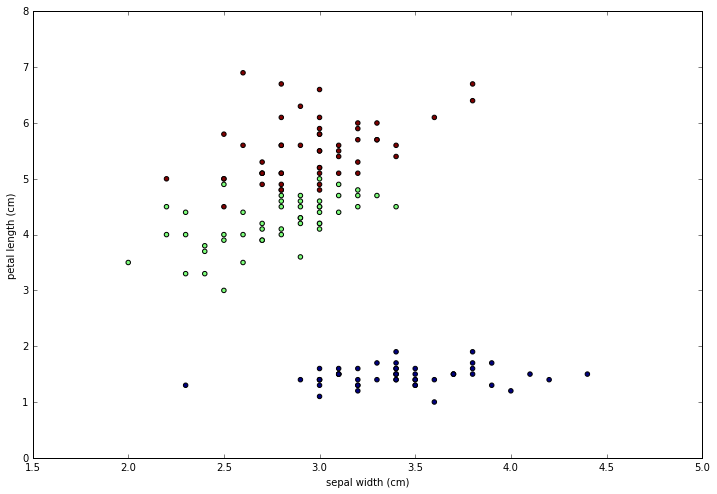

In [7]:
iris = datasets.load_iris()

plt.figure(figsize=(12,8))
plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

Support Vector Machines try to draw boundaries between different
classifications of a dataset.
In the plot above, it is pretty easy to see that one class (setosa) would be
easy to separate from the rest.
How would we separate virginica and versicolor though?

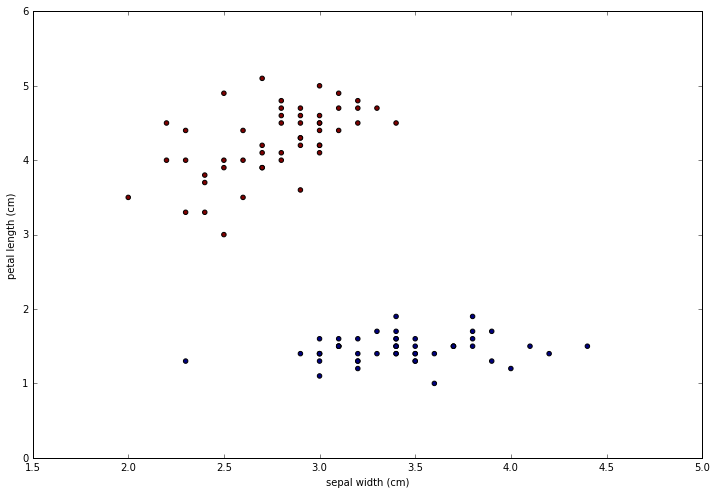

In [8]:
# The first 100 observations correspond to setosa and versicolor
plt.figure(figsize=(12,8))
plt.scatter(iris.data[0:100, 1], iris.data[0:100, 2], c=iris.target[0:100])
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

In [11]:
svc = svm.SVC(kernel='linear')
X = iris.data[0:100, 1:3]
y = iris.target[0:100]
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
# Adapted from https://github.com/jakevdp/sklearn_scipy2013
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

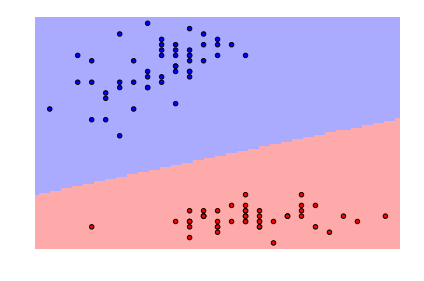

In [15]:
# Clean boundary, no misclassifications.
plot_estimator(svc, X, y)

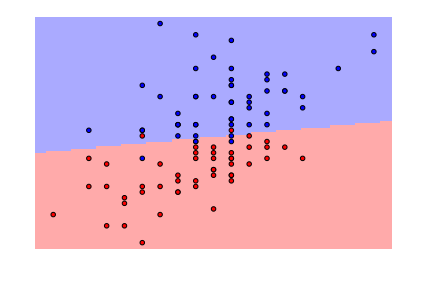

In [28]:
# We got us some misclassifications up in hurr.
# This is virginica and versicolor.
svc = svm.SVC(kernel='linear')
X = iris.data[50:150, 1:3]
y = iris.target[50:150]
svc.fit(X, y)
plot_estimator(svc, X, y)

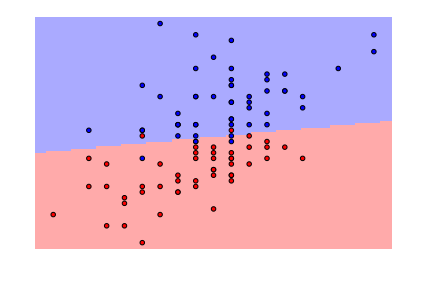

In [30]:
# We got us some misclassifications up in hurr.
# This is virginica and versicolor.
# We can "soften" the boundary with C=1.
svc = svm.SVC(kernel='linear', C=1)
X = iris.data[50:150, 1:3]
y = iris.target[50:150]
svc.fit(X, y)
plot_estimator(svc, X, y)

That didn't seem to do anything!!

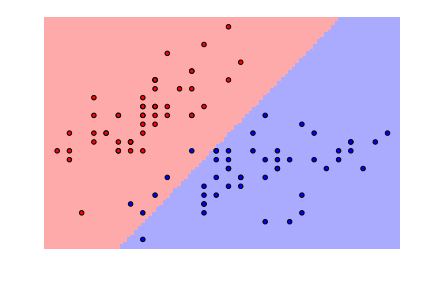

In [34]:
# We can "soften" the boundary even more with C=0.01.
svc = svm.SVC(kernel='linear', C=0.01)
X = iris.data[0:100, 0:2]
y = iris.target[0:100]
svc.fit(X, y)
plot_estimator(svc, X, y)

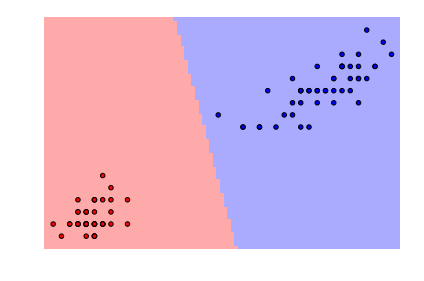

In [35]:
# We can "soften" the boundary even more with C=0.01.
svc = svm.SVC(kernel='linear', C=0.01)
X = iris.data[0:100, 2:4]
y = iris.target[0:100]
svc.fit(X, y)
plot_estimator(svc, X, y)